# Cluster Analysis Obesity Level

### Strategy of the following work is
![](<Captura de ecrã 2025-10-16 230247.png>)


In [1]:
import pandas as pd
# ==========================
# DADOS SIMULADOS MANUAIS
# ==========================

sexo = [
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino"
]

idade = [
    22, 25, 28, 31, 35,
    40, 45, 50, 55, 60,
    23, 27, 32, 37, 42,
    47, 52, 57, 62, 30,
    34, 38, 43, 48, 53,
    58, 24, 29, 33, 36
]

# ============================================================
# PESO E ALTURA AJUSTADOS PARA SIMULAR GRUPOS DISTINTOS
# ============================================================

peso = [
    # Grupo 1 (saudáveis)
    62, 55, 68, 59, 66,
    61, 63, 58, 67, 60,
    # Grupo 2 (sobrepeso)
    78, 72, 83, 76, 81,
    79, 85, 74, 88, 80,
    # Grupo 3 (obesos)
    98, 105, 95, 110, 102,
    115, 131, 108, 108, 112
]

altura = [
    # Grupo 1 (saudáveis)
    1.72, 1.65, 1.75, 1.63, 1.70,
    1.68, 1.74, 1.64, 1.73, 1.66,
    # Grupo 2 (sobrepeso)
    1.74, 1.69, 1.80, 1.70, 1.75,
    1.78, 1.76, 1.71, 1.79, 1.74,
    # Grupo 3 (obesos)
    1.70, 1.68, 1.72, 1.65, 1.74,
    1.73, 1.75, 1.69, 1.70, 1.72
]

# ============================================================
# HISTORIAL DE OBESIDADE (1=Sim, 0=Não)
# ============================================================

historial_obesidade = [
    # Saudáveis
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    # Sobrepeso
    0, 1, 1, 0, 1,
    1, 1, 1, 0, 1,
    # Obesos
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]

# ============================================================
# FREQUÊNCIAS (escala 1–4: 1=baixo, 4=alto)
# ============================================================

freq_agua = [
    # Saudáveis (bebem muita água)
    4, 4, 3, 4, 4,
    3, 4, 4, 3, 4,
    # Sobrepeso (moderado)
    3, 3, 2, 3, 2,
    3, 2, 3, 2, 2,
    # Obesos (pouca água)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_vegetais = [
    # Saudáveis (alto consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 3, 4,
    # Sobrepeso (médio)
    3, 2, 2, 3, 2,
    2, 3, 2, 3, 2,
    # Obesos (baixo)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_calorica = [
    # Saudáveis (baixo consumo)
    1, 1, 2, 1, 2,
    1, 2, 1, 1, 2,
    # Sobrepeso (moderado)
    3, 3, 3, 2, 3,
    3, 2, 3, 3, 2,
    # Obesos (elevado consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 4, 3
]

# ============================================================
# CRIAÇÃO DO DATAFRAME
# ============================================================

dados_simulados = pd.DataFrame({
    "Sexo": sexo,
    "Idade": idade,
    "Peso": peso,
    "Altura": altura,
    "Historial_Obesidade": historial_obesidade,
    "Freq_Consumo_Agua": freq_agua,
    "Freq_Consumo_Vegetais": freq_vegetais,
    "Freq_Consumo_Comida_Calorica": freq_calorica
})

dados_simulados.head(15)


,Sexo,Idade,Peso,Altura,Historial_Obesidade,Freq_Consumo_Agua,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica
0,Masculino,22,62,1.72,0,4,4,1
1,Feminino,25,55,1.65,0,4,4,1
2,Masculino,28,68,1.75,0,3,3,2
3,Feminino,31,59,1.63,0,4,4,1
4,Masculino,35,66,1.70,0,4,4,2
5,Feminino,40,61,1.68,0,3,4,1
6,Masculino,45,63,1.74,0,4,4,2
7,Feminino,50,58,1.64,0,4,4,1
8,Masculino,55,67,1.73,0,3,3,1
9,Feminino,60,60,1.66,0,4,4,2


In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas
X = dados_simulados[[
    "Idade", "Peso", "Altura",
    "Historial_Obesidade",
    "Freq_Consumo_Agua",
    "Freq_Consumo_Vegetais",
    "Freq_Consumo_Comida_Calorica"
]]


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()      #Normalizar os dados para não enviesar
X_scaled = scaler.fit_transform(X)


### Tipo de Linkage e Métrica

In [45]:
Z = linkage(X_scaled, method='single', metric='euclidean')

In [14]:
Z

array([[27.        , 28.        ,  0.41128159,  2.        ],
       [20.        , 21.        ,  0.67307947,  2.        ],
       [ 1.        ,  3.        ,  0.71798787,  2.        ],
       [24.        , 25.        ,  0.80348934,  2.        ],
       [30.        , 31.        ,  0.8097318 ,  4.        ],
       [14.        , 22.        ,  0.98908406,  2.        ],
       [ 2.        , 10.        ,  1.15554916,  2.        ],
       [ 4.        ,  6.        ,  1.2702085 ,  2.        ],
       [ 7.        ,  9.        ,  1.34224531,  2.        ],
       [29.        , 34.        ,  1.37215312,  5.        ],
       [ 5.        , 13.        ,  1.56533988,  2.        ],
       [12.        , 15.        ,  1.63310535,  2.        ],
       [19.        , 35.        ,  1.68335994,  3.        ],
       [37.        , 40.        ,  1.95443803,  4.        ],
       [16.        , 17.        ,  2.0645821 ,  2.        ],
       [11.        , 42.        ,  2.13987651,  4.        ],
       [23.        , 39.

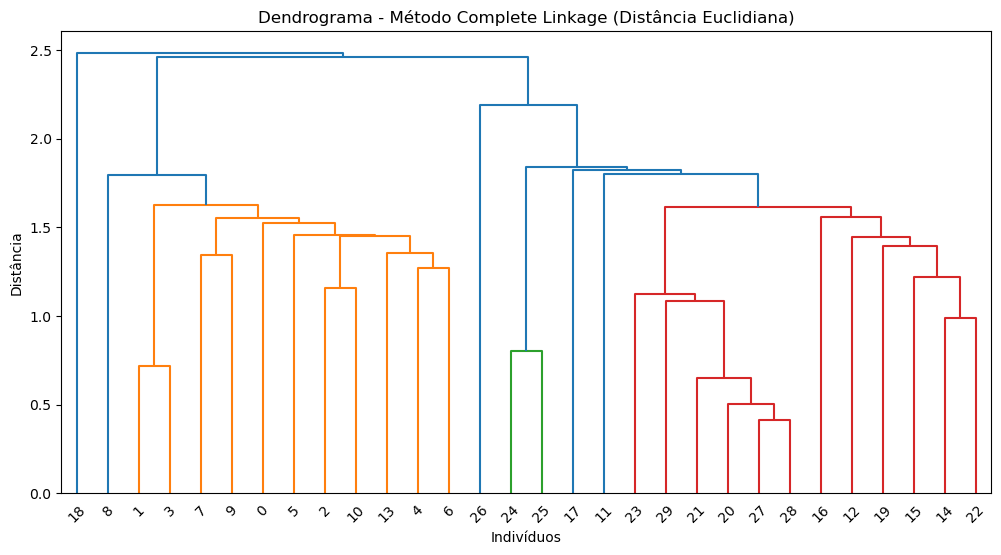

In [46]:
plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Método Complete Linkage (Distância Euclidiana)")
plt.xlabel("Indivíduos")
plt.ylabel("Distância")

dendrogram(Z)
plt.show()


In [47]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=3, criterion='maxclust')
dados_simulados["Cluster_Hierarquico"] = clusters

dados_simulados.head(10)


,Sexo,Idade,Peso,Altura,Historial_Obesidade,Freq_Consumo_Agua,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica,Cluster_Hierarquico,Grupo_Real
0,Masculino,22,62,1.72,0,4,4,1,1,0
1,Feminino,25,55,1.65,0,4,4,1,1,0
2,Masculino,28,68,1.75,0,3,3,2,1,0
3,Feminino,31,59,1.63,0,4,4,1,1,0
4,Masculino,35,66,1.70,0,4,4,2,1,0
5,Feminino,40,61,1.68,0,3,4,1,1,0
6,Masculino,45,63,1.74,0,4,4,2,1,0
7,Feminino,50,58,1.64,0,4,4,1,1,0
8,Masculino,55,67,1.73,0,3,3,1,1,0
9,Feminino,60,60,1.66,0,4,4,2,1,0


In [48]:
dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Freq_Consumo_Vegetais", "Freq_Consumo_Comida_Calorica"]].mean()


,Peso,Freq_Consumo_Vegetais,Freq_Consumo_Comida_Calorica
Cluster_Hierarquico,,,
1,64.416667,3.666667,1.583333
2,96.352941,1.588235,3.352941
3,88.000000,3.000000,3.000000


In [22]:
# Labels reais (baseados nos grupos simulados)
labels_reais = [0]*10 + [1]*10 + [2]*10


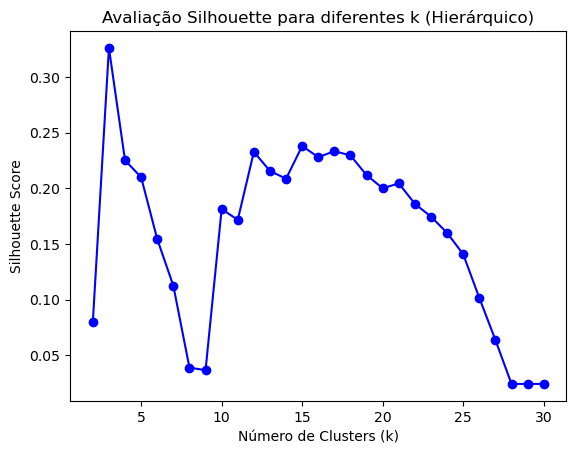

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.326)


In [73]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Distância e método de ligação
Z = linkage(X_scaled, method='single', metric='euclidean')

# Testar diferentes números de clusters
sil_scores = []
k_values = range(2, 31)

for k in k_values:
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X_scaled, clusters)
    sil_scores.append(score)

# Gráfico Silhouette vs Nº de Clusters
plt.plot(k_values, sil_scores, 'bo-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Avaliação Silhouette para diferentes k (Hierárquico)")
plt.show()

# Melhor valor
k_otimo = k_values[sil_scores.index(max(sil_scores))]
print(f"➡️ Número inicial de clusters sugerido: {k_otimo} (Silhouette = {max(sil_scores):.3f})")


In [74]:
from sklearn.metrics import adjusted_rand_score

# Clusters obtidos com o número ótimo
clusters_hier = fcluster(Z, t=k_otimo, criterion='maxclust')

# Cálculo do ARI
ari = adjusted_rand_score(labels_reais, clusters_hier)
print(f"Adjusted Rand Index (ARI) = {ari:.3f}")


Adjusted Rand Index (ARI) = 0.466


### Tabela Contingência

In [75]:
dados_simulados["Cluster_Hierarquico"] = clusters_hier
dados_simulados["Grupo_Real"] = labels_reais

pd.crosstab(dados_simulados["Grupo_Real"], dados_simulados["Cluster_Hierarquico"])


Cluster_Hierarquico,1,2,3
Grupo_Real,,,
0,10,0,0
1,2,7,1
2,0,10,0


In [76]:
# Calcular centróides dos clusters calculados
centroides_calc = dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Altura"]].mean()

# Calcular centróides dos grupos reais
centroides_reais = dados_simulados.groupby("Grupo_Real")[["Peso", "Altura"]].mean()

print("Centroides dos clusters hierárquicos:\n", centroides_calc)
print("\nCentroides dos grupos reais:\n", centroides_reais)

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708

In [77]:
import numpy as np

# Converter clusters para inteiros sequenciais começando em 0
dados_simulados["Cluster_Hierarquico"] = pd.Categorical(dados_simulados["Cluster_Hierarquico"]).codes


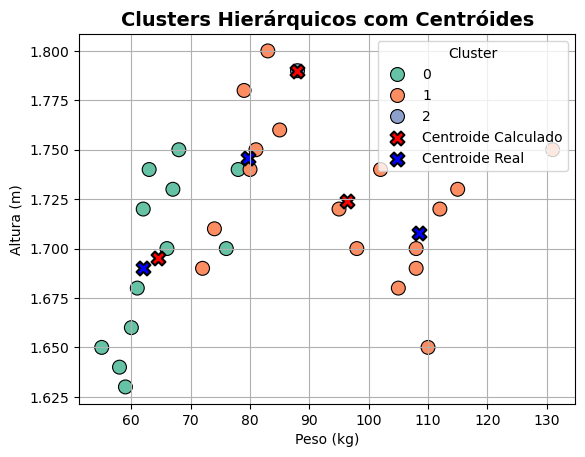

In [92]:
import seaborn as sns

# Define paleta com número de clusters únicos
num_clusters = len(dados_simulados["Cluster_Hierarquico"].unique())
palette = sns.color_palette("Set2", num_clusters)

# Plot com paleta manual
sns.scatterplot(
    x="Peso",
    y="Altura",
    hue="Cluster_Hierarquico",
    data=dados_simulados,
    palette=palette,
    s=100,
    edgecolor="k",
)

# Plot dos centróides (marcadores em forma de X)
plt.scatter(
    centroides_calc["Peso"],
    centroides_calc["Altura"],
    c="red",  # mesma cor de cada cluster
    s=100,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroide Calculado"
)

# Plot dos centróides (marcadores em forma de X)
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="blue",  # mesma cor de cada cluster
    s=100,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroide Real"
)



# Personalização do gráfico
plt.title("Clusters Hierárquicos com Centróides", fontsize=14, fontweight="bold")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()



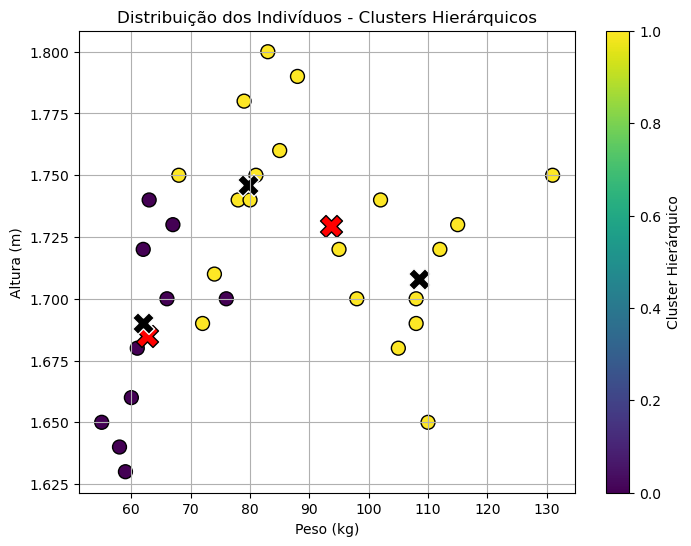

In [70]:
plt.figure(figsize=(8, 6))

# Gráfico de dispersão com cor baseada no cluster encontrado
plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Cluster_Hierarquico"],
    cmap="viridis",
    s=100,
    edgecolor="k"
)

# Centrões dos clusters
plt.scatter(
    centroides_calc["Peso"],
    centroides_calc["Altura"],
    c="red",
    s=250,
    marker="X",
    label="Centróide (Cluster Calculado)",
    edgecolor="k"
)

# Centrões dos grupos reais
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="black",
    s=250,
    marker="X",
    label="Centróide (Grupo Real)",
    edgecolor="white"
)

plt.title("Distribuição dos Indivíduos - Clusters Hierárquicos")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Cluster Hierárquico")
plt.grid(True)
plt.show()


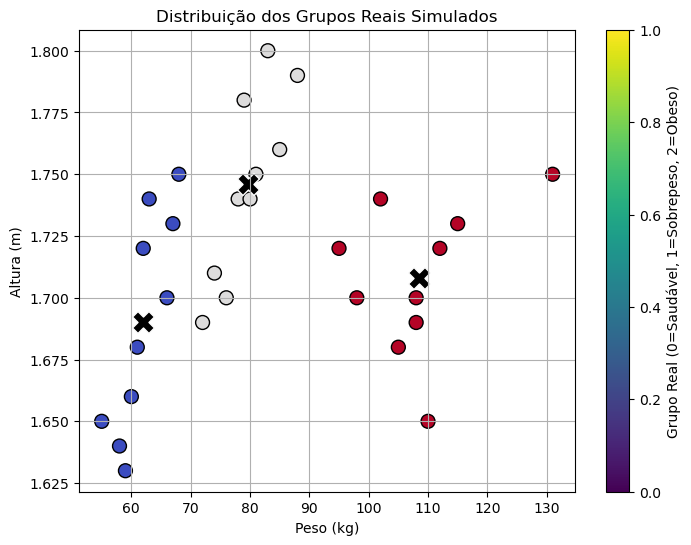

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Grupo_Real"],
    cmap="coolwarm",
    s=100,
    edgecolor="k"
)

# Centrões dos grupos reais
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="black",
    s=250,
    marker="X",
    label="Centróide (Grupo Real)",
    edgecolor="white"
)

plt.title("Distribuição dos Grupos Reais Simulados")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Grupo Real (0=Saudável, 1=Sobrepeso, 2=Obeso)")
plt.grid(True)
plt.show()


# Fase de Iteração (Hierarquical Clustering)

--- Clustering with single linkage and euclidean distance ---
DENDOGRAMA


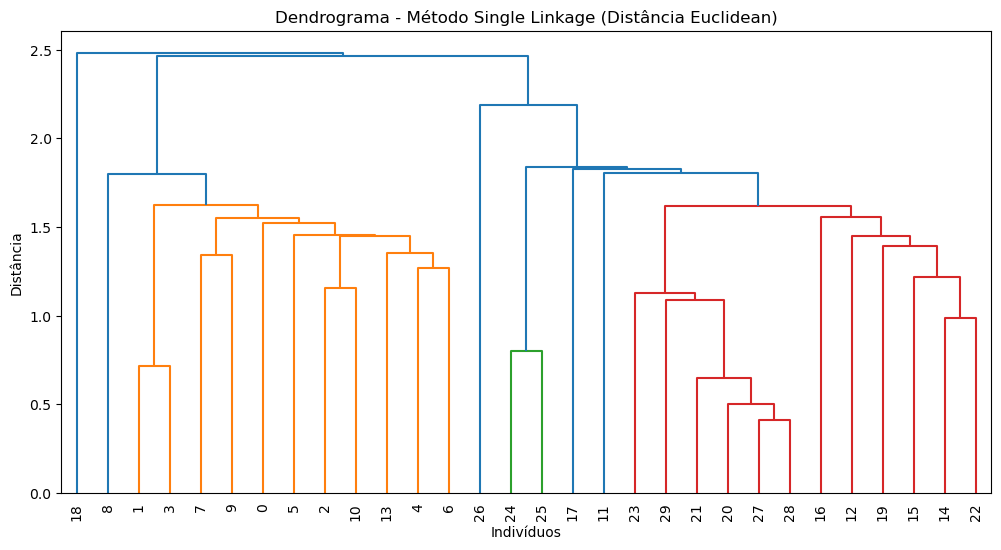

AVALIAÇÃO DO NÚMERO DE CLUSTERS


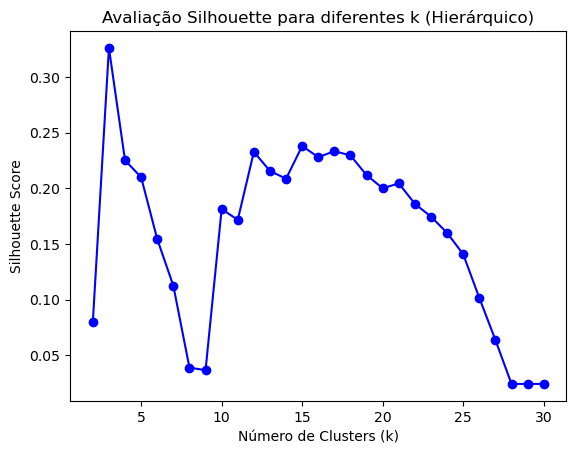

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.326)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.466
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2  3
Grupo_Real                    
0                    10   0  0
1                     2   7  1
2                     0  10  0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


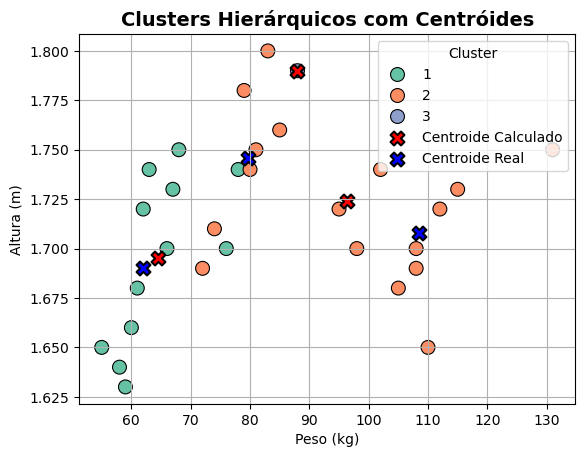

--- Clustering with single linkage and cityblock distance ---
DENDOGRAMA


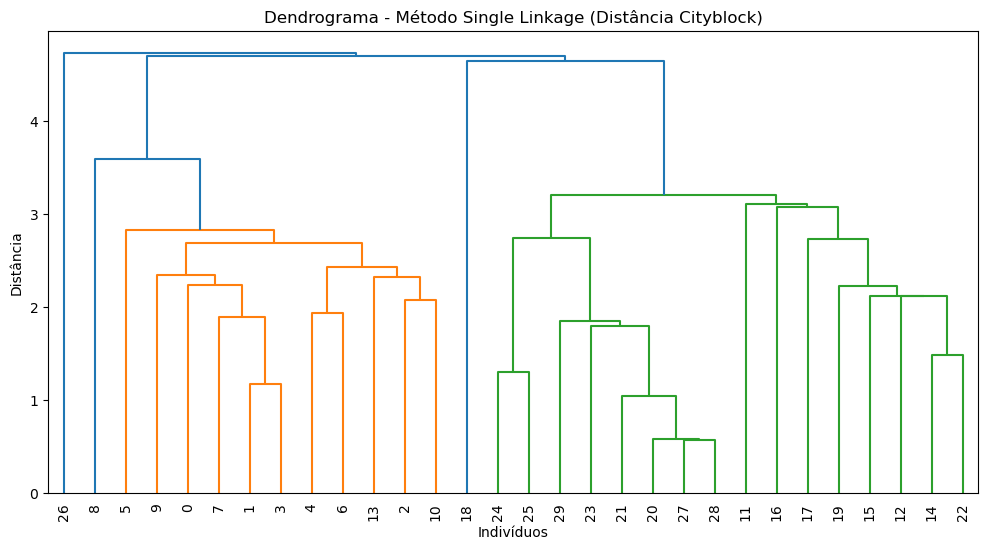

AVALIAÇÃO DO NÚMERO DE CLUSTERS


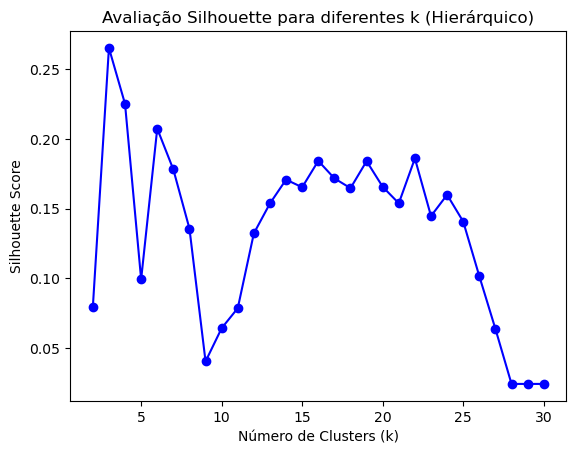

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.265)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.447
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1  2  3
Grupo_Real                   
0                    10  0  0
1                     2  8  0
2                     0  9  1
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     93.823529  1.726471
3                    131.000000  1.750000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


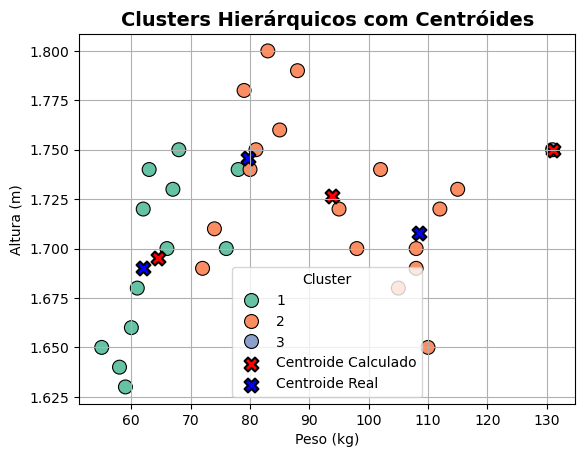

--- Clustering with single linkage and cosine distance ---
DENDOGRAMA


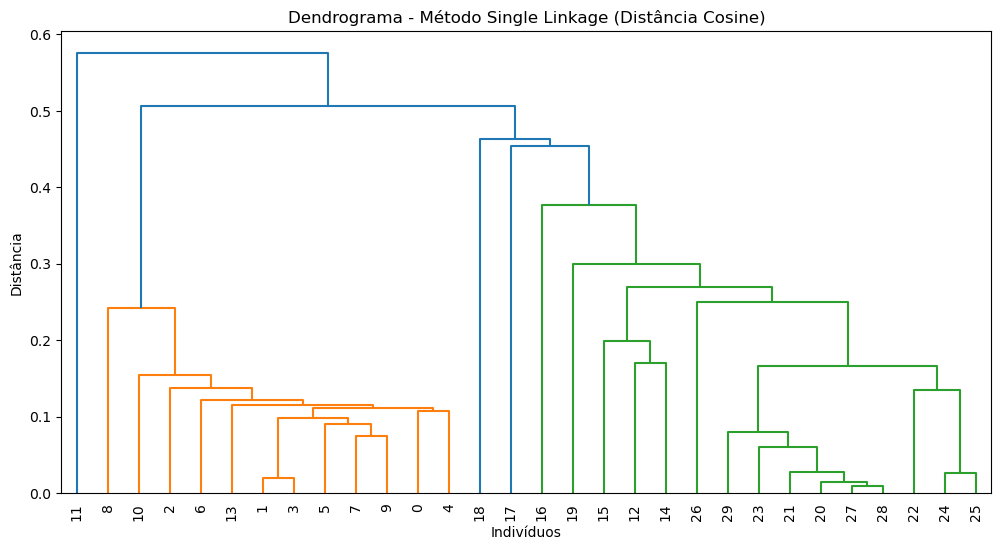

AVALIAÇÃO DO NÚMERO DE CLUSTERS


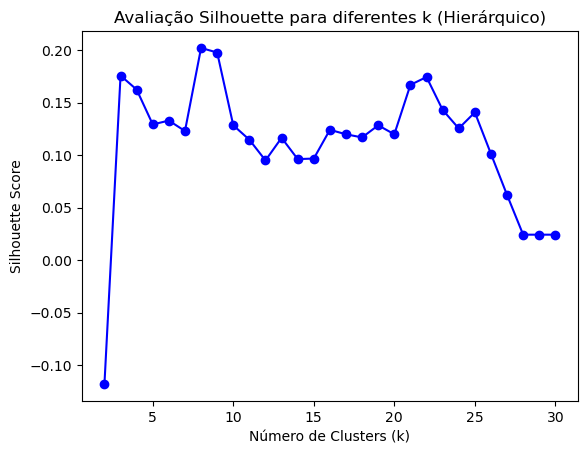

➡️ Número inicial de clusters sugerido: 8 (Silhouette = 0.202)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.658
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1  2   3  4  5  6  7  8
Grupo_Real                                   
0                    10  0   0  0  0  0  0  0
1                     2  3   0  1  1  1  1  1
2                     0  0  10  0  0  0  0  0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     81.000000  1.776667
3                    108.400000  1.708000
4                     80.000000  1.740000
5                     85.000000  1.760000
6                     74.000000  1.710000
7                     88.000000  1.790000
8                     72.000000  1.690000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108

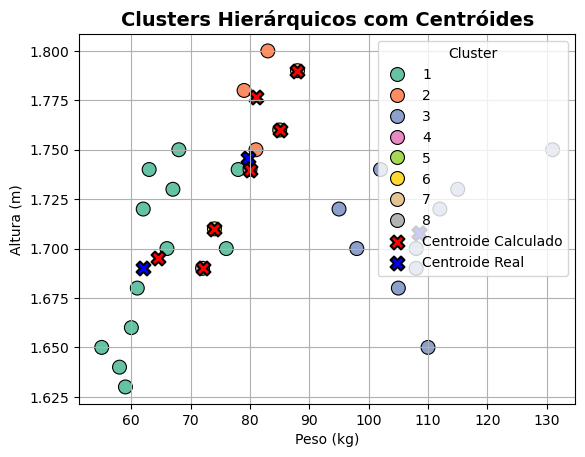

--- Clustering with complete linkage and euclidean distance ---
DENDOGRAMA


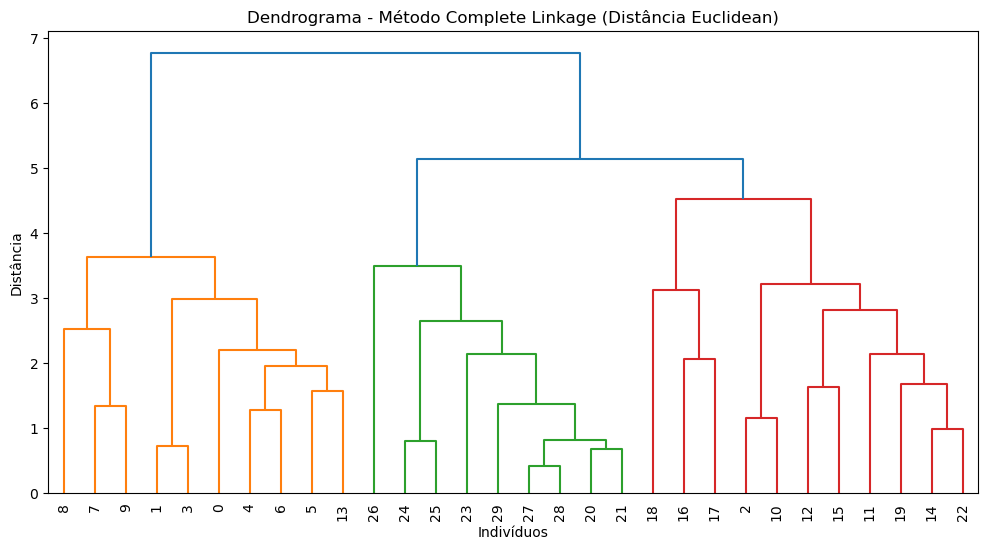

AVALIAÇÃO DO NÚMERO DE CLUSTERS


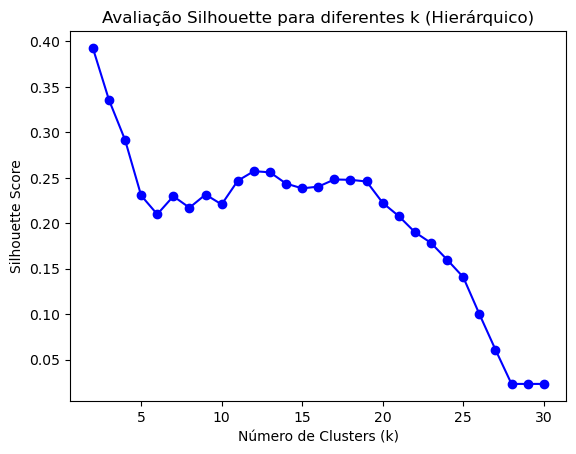

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.393)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.393
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico  1   2
Grupo_Real                
0                    9   1
1                    1   9
2                    0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                      Peso  Altura
Cluster_Hierarquico              
1                    62.7  1.6850
2                    93.6  1.7295

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


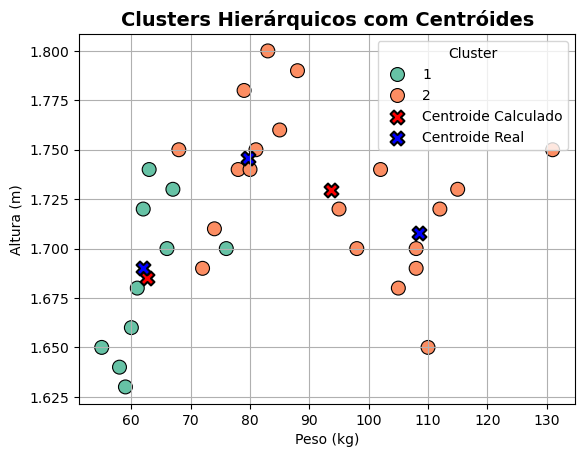

--- Clustering with complete linkage and cityblock distance ---
DENDOGRAMA


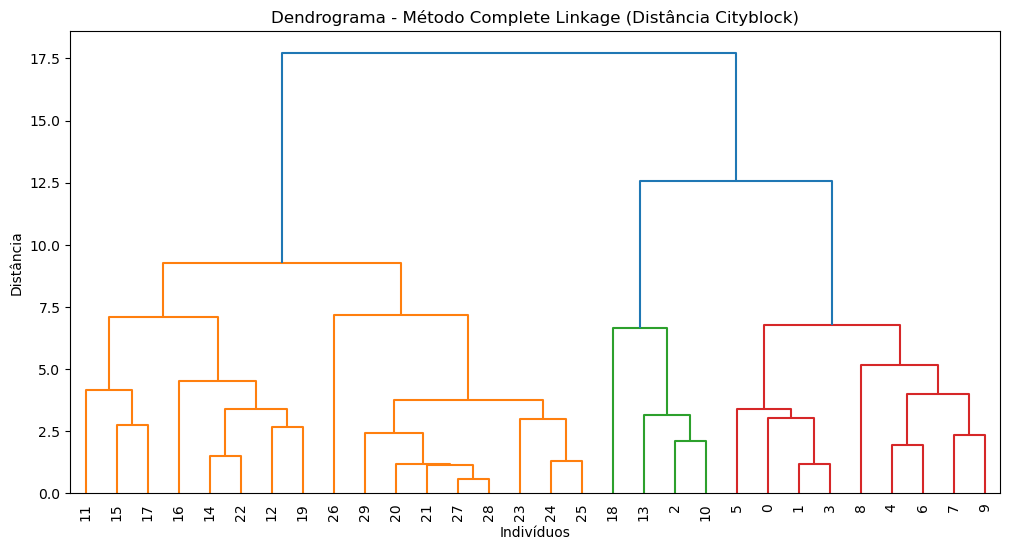

AVALIAÇÃO DO NÚMERO DE CLUSTERS


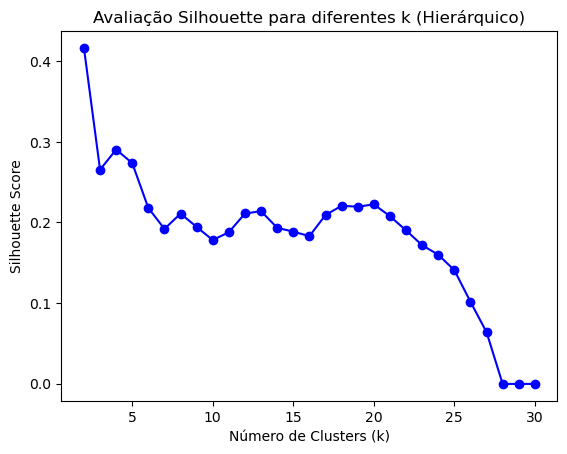

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.417)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.440
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                     0  10
1                     7   3
2                    10   0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    96.352941  1.724118
2                    66.230769  1.702308

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


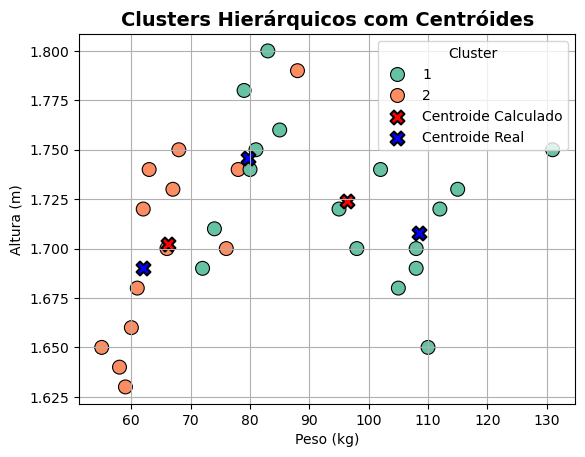

--- Clustering with complete linkage and cosine distance ---
DENDOGRAMA


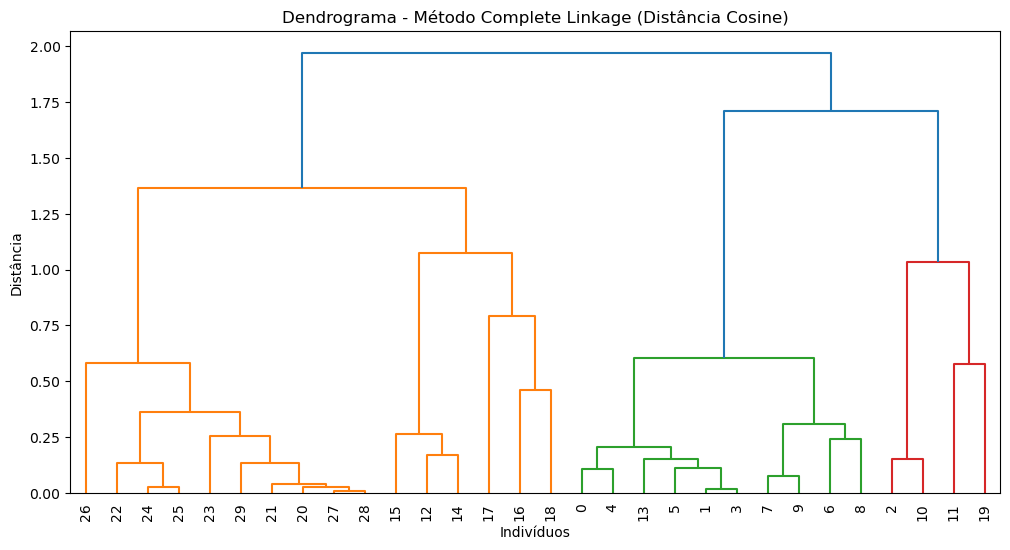

AVALIAÇÃO DO NÚMERO DE CLUSTERS


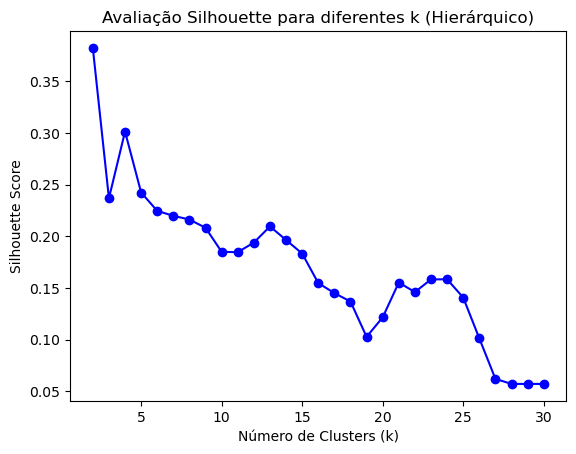

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.382)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.423
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                     0  10
1                     6   4
2                    10   0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    98.375000  1.729375
2                    66.071429  1.697857

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


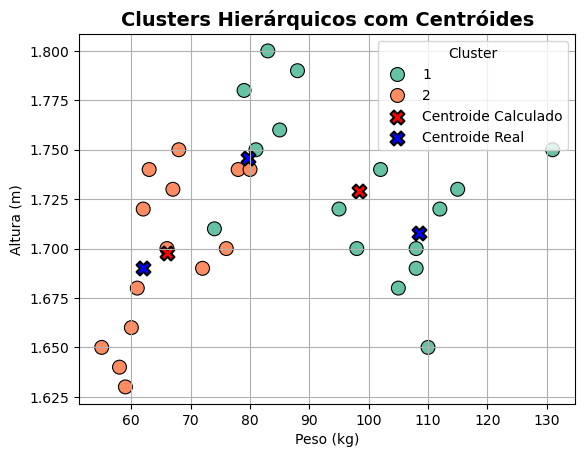

--- Clustering with average linkage and euclidean distance ---
DENDOGRAMA


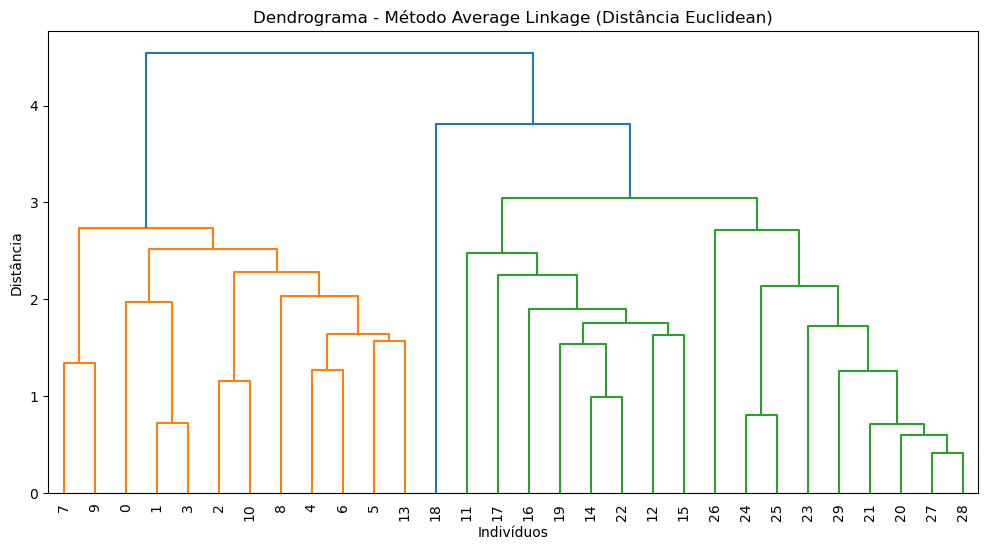

AVALIAÇÃO DO NÚMERO DE CLUSTERS


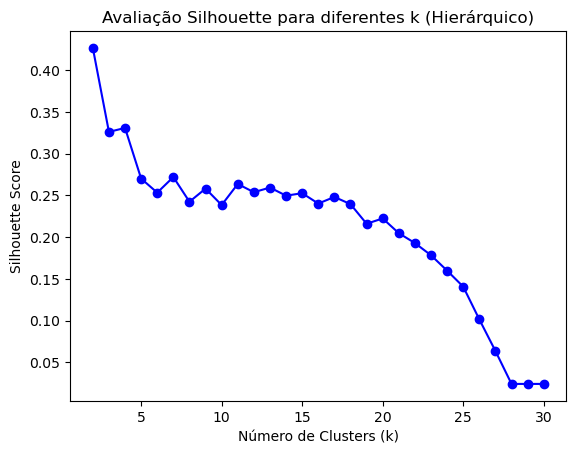

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


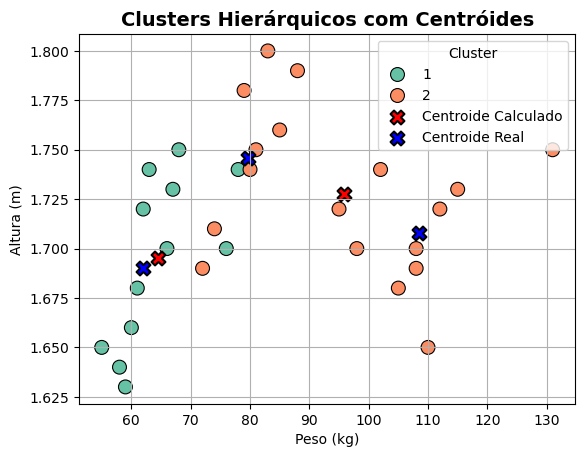

--- Clustering with average linkage and cityblock distance ---
DENDOGRAMA


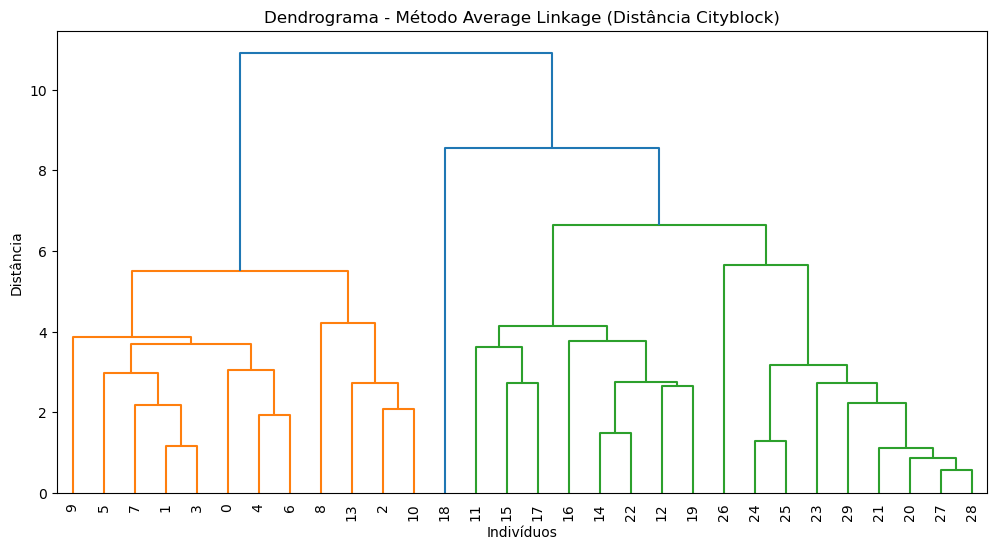

AVALIAÇÃO DO NÚMERO DE CLUSTERS


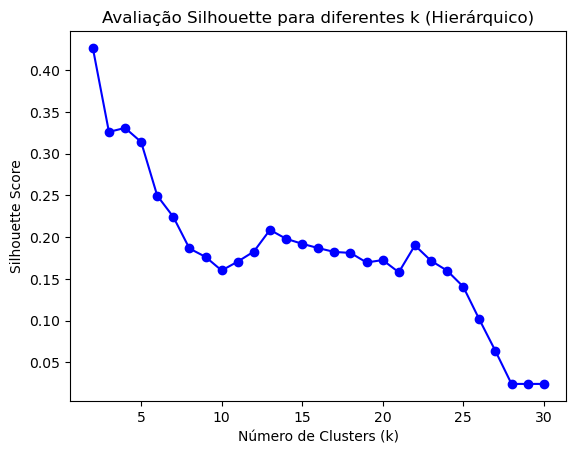

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


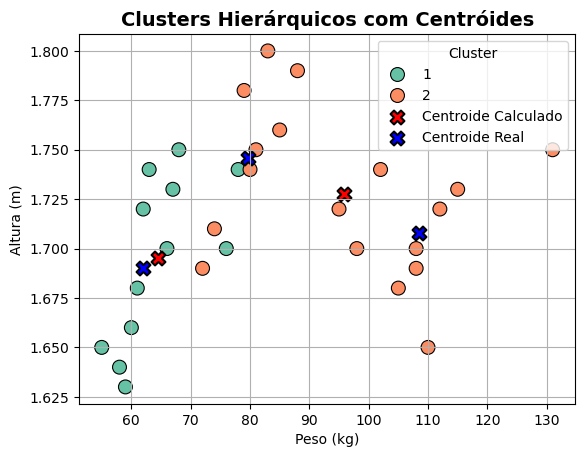

--- Clustering with average linkage and cosine distance ---
DENDOGRAMA


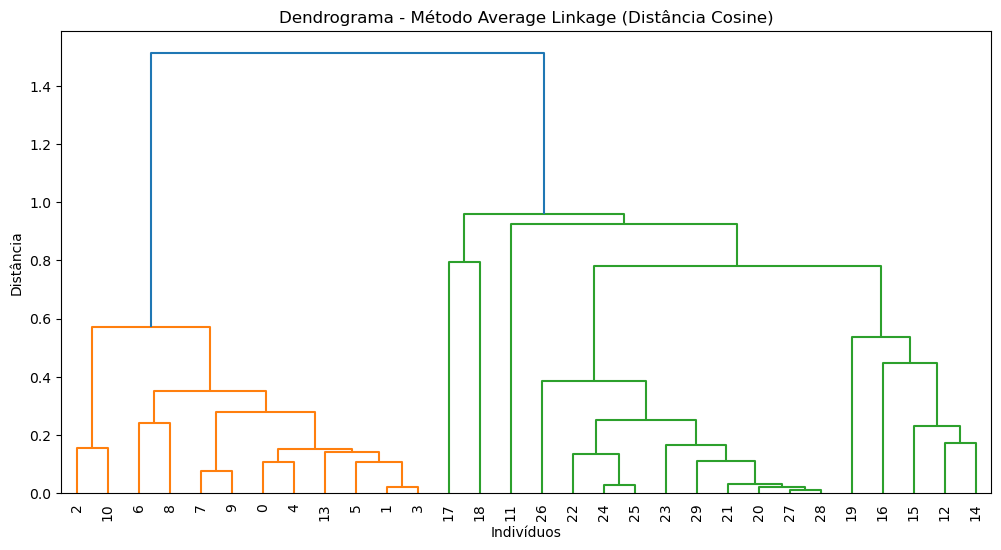

AVALIAÇÃO DO NÚMERO DE CLUSTERS


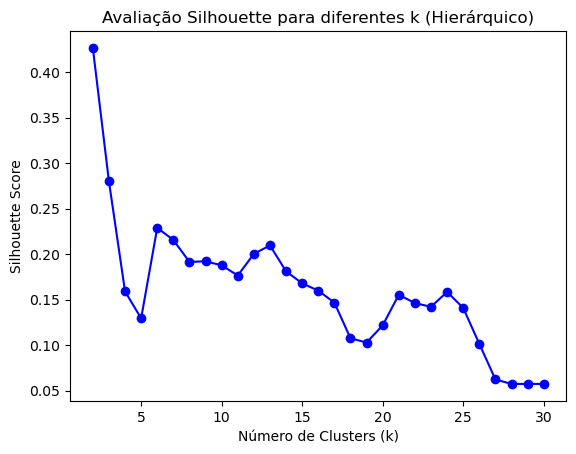

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


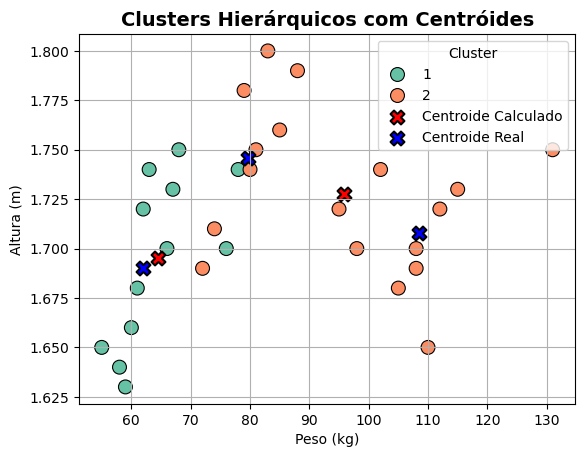

In [ ]:
listingMethods = ["single", "complete", "average"]
listingDistances = ["euclidean", "cityblock", "cosine"]
results = []
sexo = [
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino"
]

idade = [
    22, 25, 28, 31, 35,
    40, 45, 50, 55, 60,
    23, 27, 32, 37, 42,
    47, 52, 57, 62, 30,
    34, 38, 43, 48, 53,
    58, 24, 29, 33, 36
]

# ============================================================
# PESO E ALTURA AJUSTADOS PARA SIMULAR GRUPOS DISTINTOS
# ============================================================

peso = [
    # Grupo 1 (saudáveis)
    62, 55, 68, 59, 66,
    61, 63, 58, 67, 60,
    # Grupo 2 (sobrepeso)
    78, 72, 83, 76, 81,
    79, 85, 74, 88, 80,
    # Grupo 3 (obesos)
    98, 105, 95, 110, 102,
    115, 131, 108, 108, 112
]

altura = [
    # Grupo 1 (saudáveis)
    1.72, 1.65, 1.75, 1.63, 1.70,
    1.68, 1.74, 1.64, 1.73, 1.66,
    # Grupo 2 (sobrepeso)
    1.74, 1.69, 1.80, 1.70, 1.75,
    1.78, 1.76, 1.71, 1.79, 1.74,
    # Grupo 3 (obesos)
    1.70, 1.68, 1.72, 1.65, 1.74,
    1.73, 1.75, 1.69, 1.70, 1.72
]

# ============================================================
# HISTORIAL DE OBESIDADE (1=Sim, 0=Não)
# ============================================================

historial_obesidade = [
    # Saudáveis
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    # Sobrepeso
    0, 1, 1, 0, 1,
    1, 1, 1, 0, 1,
    # Obesos
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]

# ============================================================
# FREQUÊNCIAS (escala 1–4: 1=baixo, 4=alto)
# ============================================================

freq_agua = [
    # Saudáveis (bebem muita água)
    4, 4, 3, 4, 4,
    3, 4, 4, 3, 4,
    # Sobrepeso (moderado)
    3, 3, 2, 3, 2,
    3, 2, 3, 2, 2,
    # Obesos (pouca água)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_vegetais = [
    # Saudáveis (alto consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 3, 4,
    # Sobrepeso (médio)
    3, 2, 2, 3, 2,
    2, 3, 2, 3, 2,
    # Obesos (baixo)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_calorica = [
    # Saudáveis (baixo consumo)
    1, 1, 2, 1, 2,
    1, 2, 1, 1, 2,
    # Sobrepeso (moderado)
    3, 3, 3, 2, 3,
    3, 2, 3, 3, 2,
    # Obesos (elevado consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 4, 3
]

# ============================================================
# CRIAÇÃO DO DATAFRAME
# ============================================================

dados_simulados = pd.DataFrame({
    "Sexo": sexo,
    "Idade": idade,
    "Peso": peso,
    "Altura": altura,
    "Historial_Obesidade": historial_obesidade,
    "Freq_Consumo_Agua": freq_agua,
    "Freq_Consumo_Vegetais": freq_vegetais,
    "Freq_Consumo_Comida_Calorica": freq_calorica
})


def numericDataToCluster(df):
    return df[[
        "Idade", "Peso", "Altura",
        "Historial_Obesidade",
        "Freq_Consumo_Agua",
        "Freq_Consumo_Vegetais",
        "Freq_Consumo_Comida_Calorica"
    ]]

def linkageAndDistance(X_scaled, method, distance):
    Z = linkage(X_scaled, method=method, metric=distance)
    plt.figure(figsize=(12, 6))
    plt.title(f"Dendrograma - Método {method.capitalize()} Linkage (Distância {distance.capitalize()})")
    plt.xlabel("Indivíduos")
    plt.ylabel("Distância")
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
    plt.show()
    return Z

def clusterAndEvaluate(X_scaled, Z):
    # Testar diferentes números de clusters
    sil_scores = []
    k_values = range(2, 31)

    for k in k_values:
        clusters = fcluster(Z, t=k, criterion='maxclust')
        score = silhouette_score(X_scaled, clusters)
        sil_scores.append(score)

    # Gráfico Silhouette vs Nº de Clusters
    plt.plot(k_values, sil_scores, 'bo-')
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Avaliação Silhouette para diferentes k (Hierárquico)")
    plt.show()

    # Melhor valor
    k_otimo = k_values[sil_scores.index(max(sil_scores))]
    print(f"➡️ Número inicial de clusters sugerido: {k_otimo} (Silhouette = {max(sil_scores):.3f})")
    return k_otimo, max(sil_scores)


def visualizeClusters(dados_simulados):
    # Calcular centróides dos clusters calculados
    centroides_calc = dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Altura"]].mean()

    # Calcular centróides dos grupos reais
    centroides_reais = dados_simulados.groupby("Grupo_Real")[["Peso", "Altura"]].mean()

    print("Centroides dos clusters hierárquicos:\n", centroides_calc)
    print("\nCentroides dos grupos reais:\n", centroides_reais)

    # Define paleta com número de clusters únicos
    num_clusters = len(dados_simulados["Cluster_Hierarquico"].unique())
    palette = sns.color_palette("Set2", num_clusters)

    # Plot com paleta manual
    sns.scatterplot(
        x="Peso",
        y="Altura",
        hue="Cluster_Hierarquico",
        data=dados_simulados,
        palette=palette,
        s=100,
        edgecolor="k",
    )

    # Plot dos centróides (marcadores em forma de X)
    plt.scatter(
        centroides_calc["Peso"],
        centroides_calc["Altura"],
        c="red",  # mesma cor de cada cluster
        s=100,
        marker="X",
        edgecolor="black",
        linewidth=1.5,
        label="Centroide Calculado"
    )

    # Plot dos centróides (marcadores em forma de X)
    plt.scatter(
        centroides_reais["Peso"],
        centroides_reais["Altura"],
        c="blue",  # mesma cor de cada cluster
        s=100,
        marker="X",
        edgecolor="black",
        linewidth=1.5,
        label="Centroide Real"
    )



    # Personalização do gráfico
    plt.title("Clusters Hierárquicos com Centróides", fontsize=14, fontweight="bold")
    plt.xlabel("Peso (kg)")
    plt.ylabel("Altura (m)")
    plt.legend(title="Cluster", loc="best")
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    X = numericDataToCluster(dados_simulados) #Análise dos dados numéricos para clustering
    X_scaled = StandardScaler().fit_transform(X)  #Normalizar os dados para não enviesar
    labels_reais = [0]*10 + [1]*10 + [2]*10
    i = 0
    listIterations = []
    for method in listingMethods:
        for distance in listingDistances:
            print(f"--- Clustering with {method} linkage and {distance} distance ---")
            print("DENDOGRAMA")
            # Simulate clustering process
            Z = linkageAndDistance(X_scaled, method, distance)
            dados_simulados["Cluster_Hierarquico"] = fcluster(Z, t=3, criterion='maxclust')

            print("AVALIAÇÃO DO NÚMERO DE CLUSTERS")
            k_otimo, sil_score = clusterAndEvaluate(X_scaled,Z)
            
            print("CÁLCULO DO ARI")
            # Cálculo do ARI
            clusters_hier = fcluster(Z, t=k_otimo, criterion='maxclust')
            ari = adjusted_rand_score(labels_reais, clusters_hier)
            print(f"Adjusted Rand Index (ARI) = {ari:.3f}")


            dados_simulados["Cluster_Hierarquico"] = clusters_hier
            dados_simulados["Grupo_Real"] = labels_reais

            print("TABELA DE CONTINGÊNCIA")
            print(pd.crosstab(dados_simulados["Grupo_Real"], dados_simulados["Cluster_Hierarquico"]))
            
            print("VISUALIZAÇÃO DOS CLUSTERS")
            visualizeClusters(dados_simulados)
            listIterations.append((i, method, distance, k_otimo, ari, sil_score))
            Z = None
            i+=1
    

In [58]:
listIterations

[(0, 'single', 'euclidean', 3, 0.4660257454782467, 0.3260673944697844),
 (1, 'single', 'cityblock', 3, 0.4471240019553528, 0.2652760589438855),
 (2, 'single', 'cosine', 8, 0.6577674598568388, 0.20213803976239164),
 (3, 'complete', 'euclidean', 2, 0.3932307692307692, 0.3928723671995675),
 (4, 'complete', 'cityblock', 2, 0.4402616047216462, 0.4167114203669051),
 (5, 'complete', 'cosine', 2, 0.423348300192431, 0.38209261025591634),
 (6, 'average', 'euclidean', 2, 0.46805819101834284, 0.4265932868136867),
 (7, 'average', 'cityblock', 2, 0.46805819101834284, 0.4265932868136867),
 (8, 'average', 'cosine', 2, 0.46805819101834284, 0.4265932868136867)]


🔹 Clustering com SINGLE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


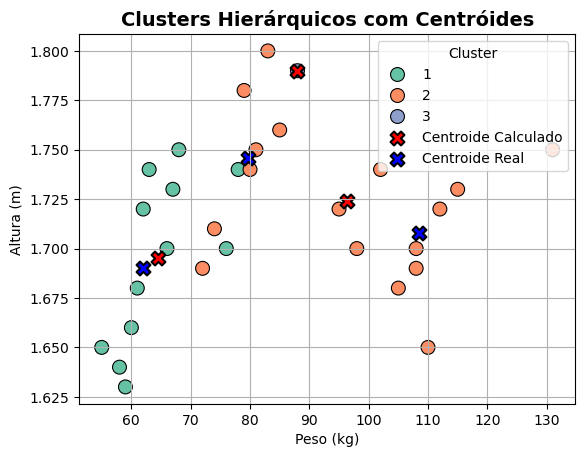


🔹 Clustering com SINGLE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     93.823529  1.726471
3                    131.000000  1.750000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


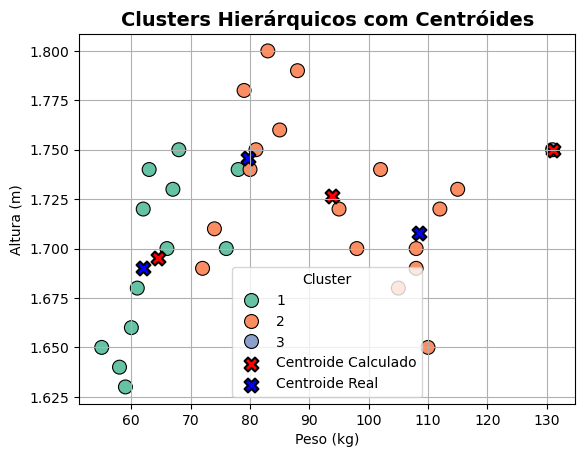


🔹 Clustering com COMPLETE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                      Peso  Altura
Cluster_Hierarquico              
1                    62.7  1.6850
2                    93.6  1.7295

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


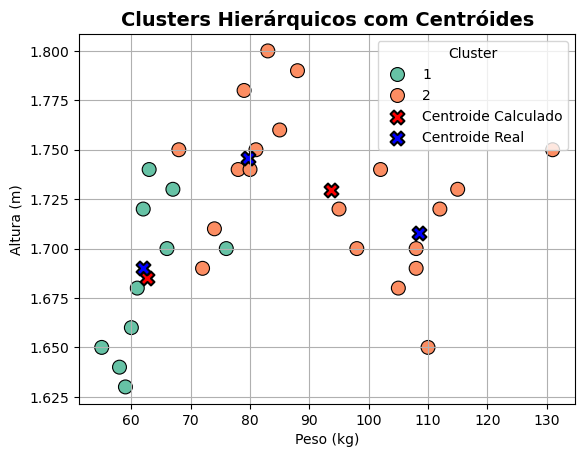


🔹 Clustering com COMPLETE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    96.352941  1.724118
2                    66.230769  1.702308

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


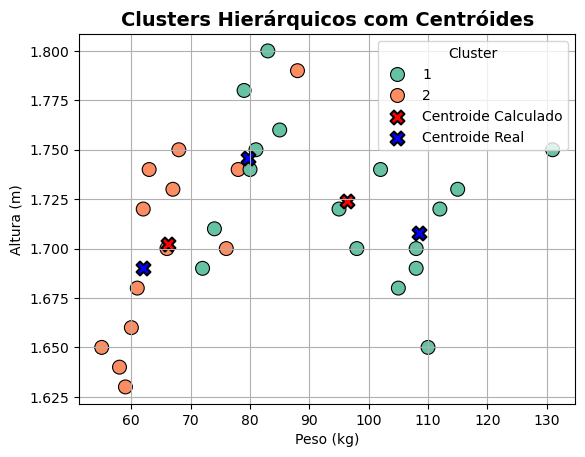


🔹 Clustering com AVERAGE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


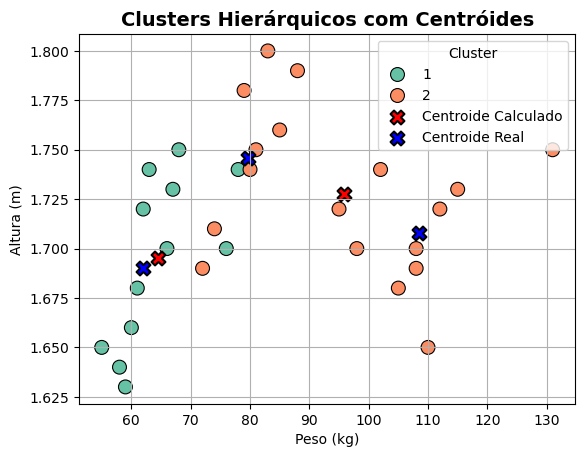


🔹 Clustering com AVERAGE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


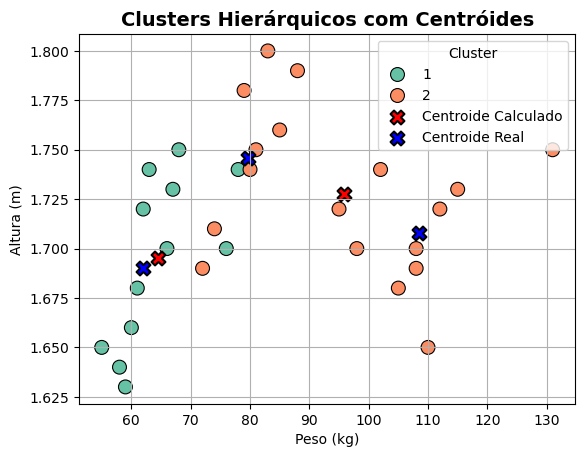


🔹 Clustering com CENTROID linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


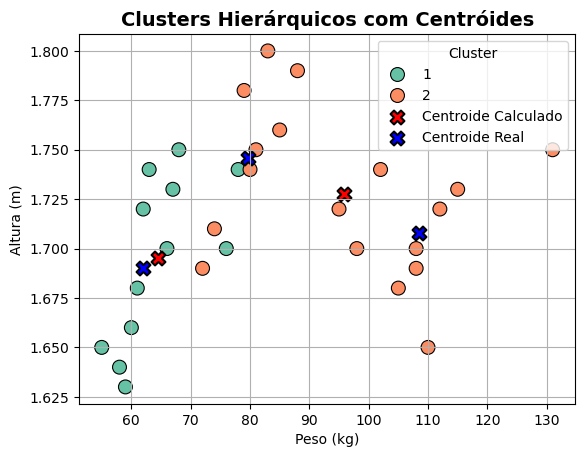


🔹 Clustering com WARD linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


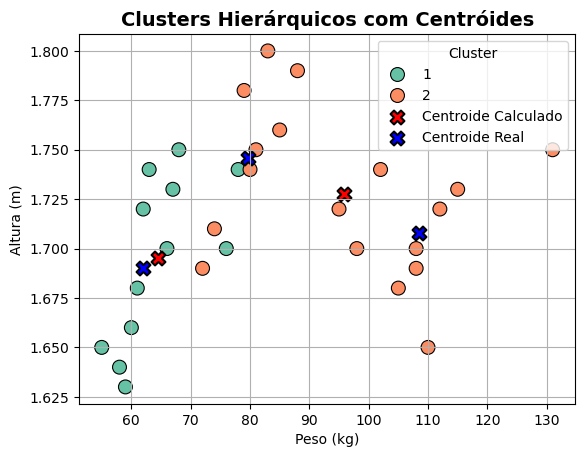

In [107]:
# ==========================================================
#  ANÁLISE HIERÁRQUICA COMPLETA (com Minkowski)
# ==========================================================
if __name__ == "__main__":

    listingMethods = ["single", "complete", "average", "centroid", "ward"]
    listingDistances = ["euclidean", "cityblock"]

    X = numericDataToCluster(dados_simulados)
    X_scaled = StandardScaler().fit_transform(X)
    labels_reais = [0]*10 + [1]*10 + [2]*10

    resultados_hierarquico = []
    i = 0

    for method in listingMethods:
        for distance in listingDistances:

            # ⚠️ Ward e Centroid apenas aceitam Euclidiana
            if method in ["ward", "centroid"] and distance != "euclidean":
                continue

            print(f"\n🔹 Clustering com {method.upper()} linkage e {distance.upper()} distance 🔹")

            Z = linkage(X_scaled, method=method, metric=distance)


            # Avaliar número ótimo via Silhouette
            sil_scores = []
            k_values = range(2, 10)
            for k in k_values:
                clusters = fcluster(Z, t=k, criterion='maxclust')
                sil_scores.append(silhouette_score(X_scaled, clusters))

            k_otimo = k_values[np.argmax(sil_scores)]
            sil_max = max(sil_scores)
            clusters_final = fcluster(Z, t=k_otimo, criterion='maxclust')

            # ARI
            ari = adjusted_rand_score(labels_reais, clusters_final)

            resultados_hierarquico.append({
                "Método": method,
                "Distância": distance,
                "Melhor k": k_otimo,
                "Silhouette": round(sil_max, 3),
                "ARI": round(ari, 3)
            })

            # Atribuir clusters e visualizar
            dados_simulados["Cluster_Hierarquico"] = clusters_final
            dados_simulados["Grupo_Real"] = labels_reais
            visualizeClusters(dados_simulados)

            i += 1




,Método,Distância,Melhor k,Silhouette,ARI
0,average,euclidean,2,0.427,0.468
1,average,cityblock,2,0.427,0.468
2,centroid,euclidean,2,0.427,0.468
3,ward,euclidean,2,0.427,0.468
4,complete,cityblock,2,0.417,0.440
5,complete,euclidean,2,0.393,0.393
6,single,euclidean,3,0.326,0.466
7,single,cityblock,3,0.265,0.447


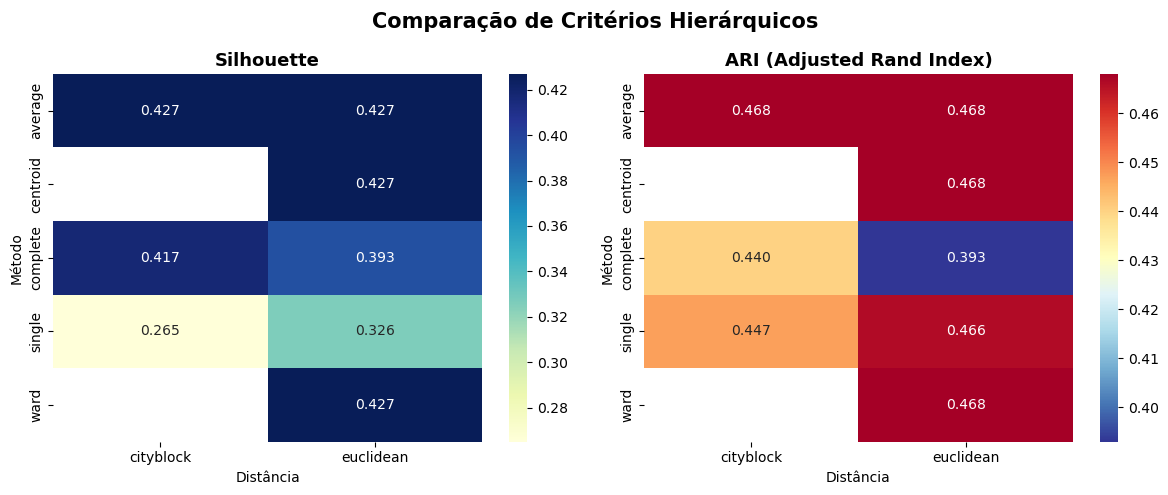


📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):


,Silhouette,ARI
Método,,
average,0.427,0.468
centroid,0.427,0.468
ward,0.427,0.468
complete,0.405,0.416
single,0.296,0.456


In [108]:

# ============================================
# TABELA FINAL DE RESULTADOS
# ============================================
df_resultados = pd.DataFrame(resultados_hierarquico)
df_resultados = df_resultados.sort_values(by="Silhouette", ascending=False).reset_index(drop=True)
display(df_resultados)

# ============================================
# HEATMAPS COMPARATIVOS
# ============================================
df_resultados["Método"] = df_resultados["Método"].astype(str)
df_resultados["Distância"] = df_resultados["Distância"].astype(str)

pivot_silhouette = df_resultados.pivot(index="Método", columns="Distância", values="Silhouette")
pivot_ari = df_resultados.pivot(index="Método", columns="Distância", values="ARI")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Silhouette", fontsize=13, fontweight="bold")

sns.heatmap(pivot_ari, annot=True, fmt=".3f", cmap="RdYlBu_r", ax=axes[1])
axes[1].set_title("ARI (Adjusted Rand Index)", fontsize=13, fontweight="bold")

for ax in axes:
    ax.set_xlabel("Distância")
    ax.set_ylabel("Método")

plt.suptitle("Comparação de Critérios Hierárquicos", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

# ============================================
# RESUMO MÉDIO POR MÉTODO (independente da distância)
# ============================================
resumo_metodo = (
    df_resultados.groupby("Método")[["Silhouette", "ARI"]]
    .mean()
    .sort_values(by="Silhouette", ascending=False)
    .round(3)
)
print("\n📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):")
display(resumo_metodo)
